In [1]:
# stop annoying warnings
import warnings
warnings.filterwarnings("ignore")

# How do I estimate the uncertainties in the slope and intercept?
## Linear regression using the Clasius-Clapeyron equation
S. Singleton, based on an assignment by J. Mills & R. Estler

Regression has a different purpose than the approaches to error analysis we have investigated thus far (propagation, descriptive statistics). Regression (and curve fitting in general) involves creating a *mathematical model* that represents existing data and enables extrapolation or interpolation for non-existent data. It is important to justify the model and its associated uncertainty. This task involves a *linear* regression; that is, finding a linear function that best represents a correlated set of data.

## Learning Objectives
After completing this work, you should be able to
- apply the Clausius-Clapyron model to temperature and pressure data
- use the so-called *normal* equations to find the best estimates for the constants A (intercept) and B (slope) in the linear relationship $y=Bx + A$
- calculate the estimated uncertainties in A and B
- compare an experimental result to an accepted result

## Information
- *An Introduction to Error Analysis*, J. Taylor, 1997, Ch 8
![Taylor Cover](http://www.uscibooks.com/taylor_errorcov.jpg)
- Web searches will yield (too?) many discussions and videos on linear regression. Pick one that covers the basics of LR and the tool you're using. Note that "add trendline" isn't a regression...it's often just the line with no information about the quality of the fit. There are functions in spreadsheets and python that do provide this information.
- [Clausius-Clapyron Equation](https://en.wikipedia.org/wiki/Clausius%E2%80%93Clapeyron_relation#Chemistry_and_chemical_engineering)
- YTV: [The Clausius Clapeyron Equation](https://www.youtube.com/watch?v=tZw5cjY-8VU) (overview)
- YTV: [Chemical Thermodynamics - Clausius-Clapeyron Equation](https://www.youtube.com/watch?v=MC9ZoKMkSZI) (derivation)

<table border="0">

<tr><td><img style="height: 370px;" src="rclausius.jpg"></td>
<td><img src="Clapeyron-reading.jpg"></td></tr><caption>Clausius and Clapeyron</caption></table>

## Hints
 - Remember to explicitly state assumptions, conditions, simplifications, etc., that affect your conclusions. 
 - Don't forget to convert cells to markdown mode if writing text. 
 - Images (jpg, png, gif) from other sources can be saved in the same folder as this notebook and rendered in markdown cells. (This notebook shows two ways of including images.)
 - A [markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
 - A [LaTeX cheatsheet](https://wch.github.io/latexsheet/latexsheet.pdf)

## Critical Thinking Questions

(1)  Is the sign of $\Delta H_{\rm vap}$ positive or negative? Explain.

Positive. Slope tends to be negative, so we put a negative sign in front of $\Delta H_{\rm vap}$ to match the graph.

(2) Does $\Delta H_{\rm vap}$ change as a function of temperature? Explain.

Yes, as temperature changes, so does $\Delta H_{\rm vap}$. Also https://en.wikipedia.org/wiki/Enthalpy_of_vaporization

(3) Does the vapor pressure of a substance vary with temperature? Explain.

Yes because of the ideal gas law.

(4) Describe an experiment designed to measure vapor pressure as a function of temperature. Be specific about the equipment and procedure.

First the vapor must be collected, so perhaps set up a system where a roundbottomed flask has water heated to > 100 degrees C. Then send the vapor through glass tubes into a canister that does not change shape. Put a thermometer on the inside and heat it up, while reading pressure with a tool. This has a reasonable experiment -- http://www.csun.edu/~ml727939/coursework/695/vapor%20pressure/Vapor%20Pressure.htm

(5) What types of errors or uncertainties would be present in your experiment? Which measurement(s) would be associated with the greatest uncertainty? Explain your reasoning.

Measuring the density of the oil, measuring the height of the oil. Probably the height of the oil because we would need to use a ruler and our eyes, which is not very precise.

## Model: The Clausius-Clapeyron Equation
The (simplified) Clausius-Clapeyron equation linearizes the relationship between vapor pressure and temperature. Using the notation in Taylor

$$\begin{align}
  \ln P \quad & = \quad  -\frac{\Delta H}{R} \quad \frac{1}{T} \quad  +
  \quad  \text{constant} \\[8pt]
  y\quad & = \qquad \; B \quad \quad x \quad  + \qquad A
\end{align}$$

$\Delta H_{\rm vap}$ is in the slope of a linear regression of $\ln(P)$ vs $1/T$. The error in the slope, $\sigma_B$, is the error in $\Delta H_{\rm vap}$.

N.B.: The references in Information all have slightly different conventions, so be attentive to units and notation. Taylor presents simplified algebraic derivations of the normal equations, but this can be done more rigorously using calculus and made more scalable using design matrices.

# Problem

Compute the slope and intercept with associated errors (in *Taylor* Ch 8, these are $A$, $B$, $\sigma _A$, and
  $\sigma _B$) for the ethanol vapor pressure data below.  Use these results to determine $\Delta H_{\text{vap}}$ and $\sigma
  _{\Delta\text{H}}$ for ethanol. Do not forget to convert units. Evaluate the agreement of these data with the accepted value for the enthalpy vaporization of ethanol, citing sources properly. 
  
Generate a Beautiful Plot with an informative caption that follow guidelines in the GWAC. If using a spreadsheet, upload the plot in the form of a png or jpg to this folder and link to the file using markdown. Holler if you're not sure how to do this.

If you use a spreadsheet, upload the file to this folder and add a markdown link pointing to the file.

<pre>
T/C      P/Torr  σ_P/Torr
25.00    55.9    3.0 
30.00    70.0    3.0 
35.00    93.8    4.2 
40.00    117.5   5.5
45.00    154.0   6.0
50.00    190.7   7.6
55.00    241.9   8.0
60.00    304.2   8.8
65.00    377.9   9.5
<pre>

## Solution

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy.stats import linregress

In [3]:
x = np.array([25.00,30.00,35.00,40.00,45.00, 50.00,55.00,60.00,65.00])
y = np.array([55.9, 70.0,93.8,117.5,154.0,190.7,241.9,304.2,377.9])

In [4]:
p = np.log(y/760.00)
t = 1/(x+273.15)
print(p,t)

[-2.60975405 -2.38482319 -2.09215358 -1.8668801  -1.59636583 -1.38261692
 -1.14479402 -0.91563305 -0.69868882] [ 0.00335402  0.0032987   0.00324517  0.00319336  0.00314317  0.00309454
  0.00304739  0.00300165  0.00295727]


In [5]:
#slope, intercept, *rest = linregress(x, y)
#telling to only pull out slope and intercept
slope, intercept, *rest = linregress(t, p)
print(slope)

-4853.25522445


In [6]:
st = t**2
stsum = np.sum(st) #takes sum of all x^2
tsums = np.sum(t)**2 #takes square of sum of x
count = np.count_nonzero(t) #gives total number of data points in x
delta = count*stsum -tsums #solves for delta
print('Delta =',delta)

Delta = 1.32707253774e-06


In [7]:
eqline = 0;
eqlinesum = 0;
for x in p:
    eqline = (p[x] - intercept - slope*t[x])**2 #solves for the value of each equation for each value of x
    eqlinesum += eqline #adds up equation values to get the sum
sigmay = np.sqrt(1/(count-2)*eqlinesum) #equation to solve for sigma y
print('Sigma y =',sigmay)

Sigma y = 0.0124633351552


In [8]:
p[0]

-2.6097540531193233

In [9]:
sigmaa = sigmay*np.sqrt(stsum/delta) #equation to solve for sigma a or uncertainty in y-intercept
sigmab = sigmay*np.sqrt(count/delta) #equation to solve for sigma b or uncertainty in slope
print('Uncertainty y-intercept =', sigmaa)
print('Uncertainty in slope and Delta H =', sigmab)

Uncertainty y-intercept = 0.102270762744
Uncertainty in slope and Delta H = 32.4569867052


In [10]:
R = 8.314
deltah = -slope*R #equation to solve for delta H
print('Delta H =',deltah)

Delta H = 40349.9639361


https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models

In [11]:
print('Delta H_vap: ',deltah, " +/- ", sigmab, "J/mol")

Delta H_vap:  40349.9639361  +/-  32.4569867052 J/mol


According to http://webbook.nist.gov/cgi/cbook.cgi?ID=C64175&Mask=4, the enthalpy of ethanol vaporization should be within a range of 14.2-54.1 kJ/mol or 14200-54100 J/mol. Though when looking at temperatures, most of the experiments done at similar temperatures have a value of 42000 J/mol which is very close to the value I calculated for the enthalpy of ethanol vaporization. My value agrees with previously calculated values.


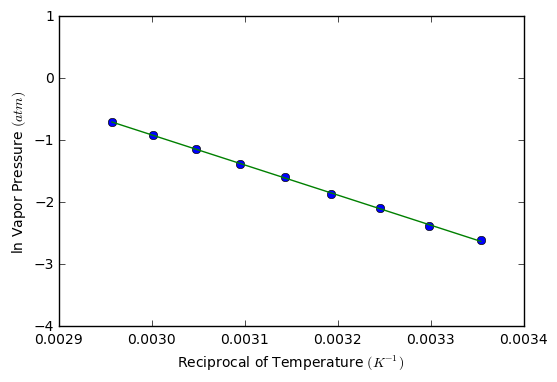

In [20]:
plt.errorbar(t, p, fmt='', capsize=10, capthick=2, marker = 'o', linestyle='None', clip_on=False)
plt.plot(t, slope*t+intercept)
plt.xlim(0.0029, 0.0034)
plt.ylim(-4, 1)
#plt.grid()
plt.xlabel(r'Reciprocal of Temperature $(K^{-1})$')
plt.ylabel(r'ln Vapor Pressure $(atm)$') #r means raw, so if $\alpha$, won't bother

This graph shows the linear regression of $\ln(P)$ vs $1/T$ for ethanol. The slope is -4853, which suggests $\Delta H_{\rm vap}$ is 40350 $\pm$ 32 J/mol. 